Problem 2: Learning to implement Neural Network : Gurmukhi Handwritten Digit Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
#Importing required libraries

import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define the path to the train and test data directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/GurNum/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/GurNum/val'

# Define the image size and the number of channels
IMG_SIZE = 32
NUM_CHANNELS = 1

# Define the empty lists to store the images and their respective labels
train_images, train_labels = [], []
test_images, test_labels = [], []

# Loop through each subdirectory in the train directory and read the images
for subdir in os.listdir(train_dir):
    # Define the path to the current subdirectory
    subdir_path = os.path.join(train_dir, subdir)
    # Get the list of all image files in the current subdirectory
    files = os.listdir(subdir_path)
    # Loop through each image and read it
    for file in files:
        # Define the path to the current image
        img_path = os.path.join(subdir_path, file)
        # Read the image and resize it to the defined size
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        # Append the image and its respective label to the lists
        train_images.append(img)
        train_labels.append(int(subdir))

# Loop through each subdirectory in the test directory and read the images
for subdir in os.listdir(test_dir):
    # Define the path to the current subdirectory
    subdir_path = os.path.join(test_dir, subdir)
    # Get the list of all image files in the current subdirectory
    files = os.listdir(subdir_path)
    # Loop through each image and read it
    for file in files:
        # Define the path to the current image
        img_path = os.path.join(subdir_path, file)
        # Read the image and resize it to the defined size
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        # Append the image and its respective label to the lists
        test_images.append(img)
        test_labels.append(int(subdir))

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize the pixel values of the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Print the shape of the training data and target labels
print("Train Images shape:", train_images.shape) 
print("Train Labels shape:", train_labels.shape)
print("Test Images shape:", test_images.shape) 
print("Test Labels shape:", test_labels.shape)

Train Images shape: (1000, 32, 32)
Train Labels shape: (1000,)
Test Images shape: (178, 32, 32)
Test Labels shape: (178,)


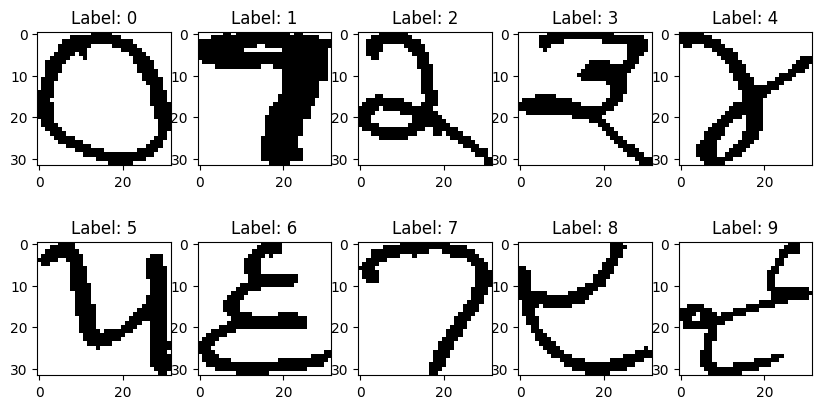

In [ ]:
# Display sample training images obtained from the dataset for digits 0 to 9

fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.ravel()
for i in range(10):
    idx = np.where(train_labels == i)[0][0]
    axs[i].imshow(train_images[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    axs[i].set_title(f"Label: {train_labels[idx]}")
plt.show()


**MODEL BUILDING**

In [ ]:
# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
32/32 [==============================] - 1s 20ms/step - loss: 1.5065 - accuracy: 0.5900 - val_loss: 0.9955 - val_accuracy: 0.7865
Epoch 2/20
32/32 [==============================] - 0s 13ms/step - loss: 0.5563 - accuracy: 0.9250 - val_loss: 0.6042 - val_accuracy: 0.8764
Epoch 3/20
32/32 [==============================] - 0s 13ms/step - loss: 0.3487 - accuracy: 0.9450 - val_loss: 0.5178 - val_accuracy: 0.8539
Epoch 4/20
32/32 [==============================] - 0s 13ms/step - loss: 0.2607 - accuracy: 0.9590 - val_loss: 0.3909 - val_accuracy: 0.9213
Epoch 5/20
32/32 [==============================] - 0s 10ms/step - loss: 0.2075 - accuracy: 0.9720 - val_loss: 0.3510 - val_accuracy: 0.8989
Epoch 6/20
32/32 [==============================] - 0s 10ms/step - loss: 0.1758 - accuracy: 0.9670 - val_loss: 0.3029 - val_accuracy: 0.9382
Epoch 7/20
32/32 [==============================] - 0s 12ms/step - loss: 0.1380 - accuracy: 0.9830 - val_loss: 0.2789 - val_accuracy: 0.9382
Epoch 8/20
32

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               131200    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


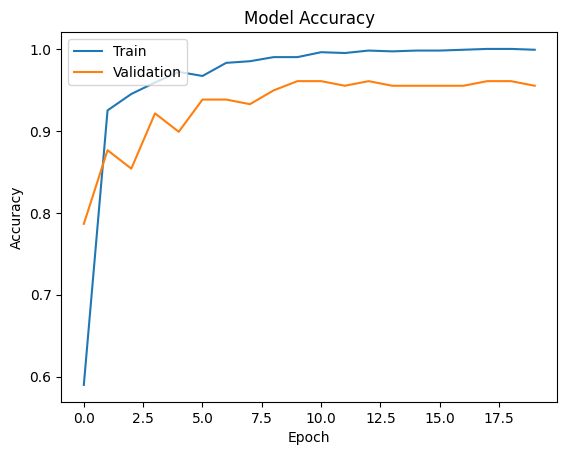

In [ ]:
#Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

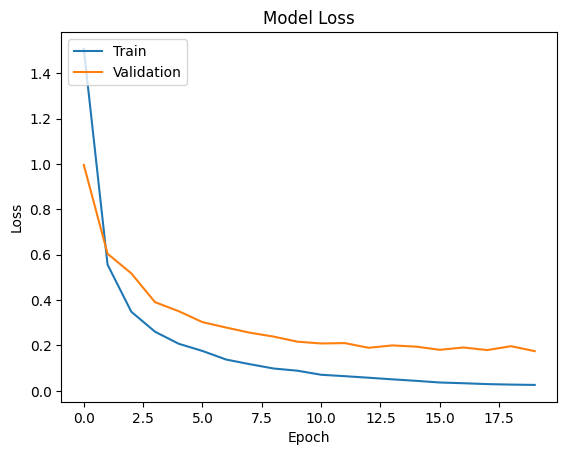

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

6/6 [==============================] - 0s 3ms/step
tf.Tensor(
[[18  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  3  0  0]
 [ 0  0 14  0  1  1  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  2  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0 20]], shape=(10, 10), dtype=int32)


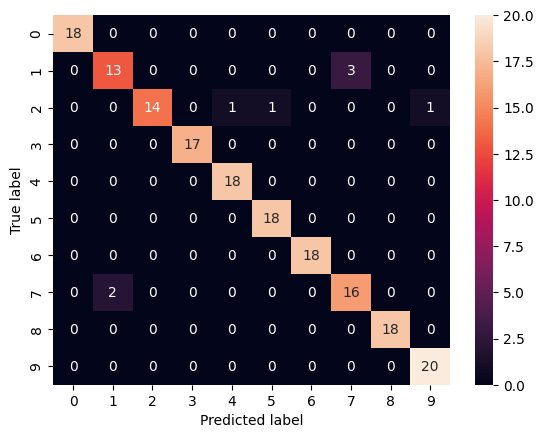

In [ ]:
# Predict the class labels for the test data
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create a confusion matrix to evaluate the performance of the model
confusion_mtx = tf.math.confusion_matrix(test_labels, y_pred)

# Print the confusion matrix
print(confusion_mtx)

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.87      0.81      0.84        16
           2       1.00      0.82      0.90        17
           3       1.00      1.00      1.00        17
           4       0.95      1.00      0.97        18
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        18
           7       0.84      0.89      0.86        18
           8       1.00      1.00      1.00        18
           9       0.95      1.00      0.98        20

    accuracy                           0.96       178
   macro avg       0.96      0.95      0.95       178
weighted avg       0.96      0.96      0.95       178



2/2 [==============================] - 0s 7ms/step


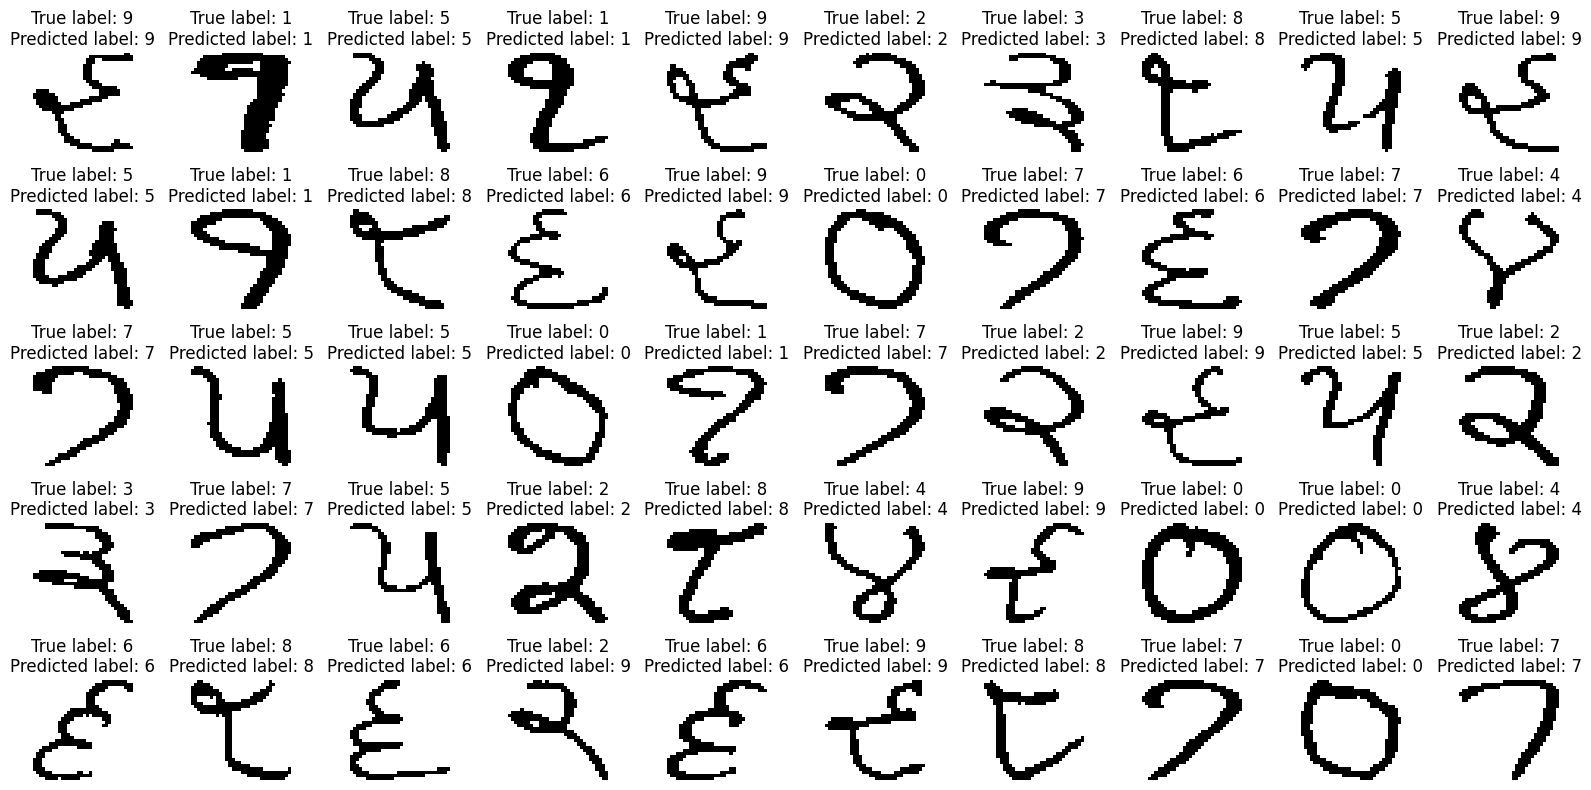

In [ ]:
# Print some sample predictions

NUM_SAMPLES = 50 # Define the number of sample images to use

# Select a random subset of test images and labels for prediction
sample_indices = np.random.choice(len(test_images), size=NUM_SAMPLES, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# Use the trained model to predict the labels for the sample images
sample_predictions = model.predict(sample_images)

# Display the sample images along with their true and predicted labels
fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(16, 8))

for i, ax in enumerate(axs.flatten()):
    true_label = sample_labels[i]
    predicted_label = np.argmax(sample_predictions[i])

    ax.imshow(sample_images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    ax.set_title(f"True label: {true_label}\nPredicted label: {predicted_label}")
    ax.axis('off')

fig.tight_layout()
plt.show()